# Deconstructing Frame Dragging by Herrera
##  Geoff Cope
##  Univeristy of Utah
##  December 24, 2021 Christmas Eve!

There are several metrics in this notebook and here we concentrate on metric 22.  We'll come back and finsih the others later.

https://arxiv.org/abs/2102.03552

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz = symbols( 't rho phi z dt drho dphi dz' ) 

In [4]:
f,omega,gamma = symbols( 'f omega gamma')

In [5]:
f = Function('f')(rho,z)
f

In [6]:
omega = Function('omega')(rho,z)
omega

In [7]:
gamma = Function('gamma')(rho,z)
gamma

In [8]:
variables = Matrix( [t,rho,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [10]:
differentials = Matrix( [dt,drho,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [14]:
lineElement = expand(- f * dt**2  +  2 * omega * f * dt * dphi + f**-1 * exp(2*gamma) * (drho**2 + dz**2 ) + (f**-1 * rho**2 - f * omega**2 ) * dphi**2)
lineElement

In [15]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡   -f(ρ, z)          0            f(ρ, z)⋅ω(ρ, z)            0     ⎤
⎢                                                                   ⎥
⎢                  2⋅γ(ρ, z)                                        ⎥
⎢                 ℯ                                                 ⎥
⎢       0         ──────────              0                   0     ⎥
⎢                  f(ρ, z)                                          ⎥
⎢                                                                   ⎥
⎢                                 2                                 ⎥
⎢                                ρ               2                  ⎥
⎢f(ρ, z)⋅ω(ρ, z)      0       ─────── - f(ρ, z)⋅ω (ρ, z)      0     ⎥
⎢                             f(ρ, z)                               ⎥
⎢                                                                   ⎥
⎢                                                          2⋅γ(ρ, z)⎥
⎢                                                         ℯ         ⎥
⎢       0           

In [16]:
import sympy

In [17]:
m = sympy.Array(g)
m

⎡   -f(ρ, z)          0            f(ρ, z)⋅ω(ρ, z)            0     ⎤
⎢                                                                   ⎥
⎢                  2⋅γ(ρ, z)                                        ⎥
⎢                 ℯ                                                 ⎥
⎢       0         ──────────              0                   0     ⎥
⎢                  f(ρ, z)                                          ⎥
⎢                                                                   ⎥
⎢                                 2                                 ⎥
⎢                                ρ               2                  ⎥
⎢f(ρ, z)⋅ω(ρ, z)      0       ─────── - f(ρ, z)⋅ω (ρ, z)      0     ⎥
⎢                             f(ρ, z)                               ⎥
⎢                                                                   ⎥
⎢                                                          2⋅γ(ρ, z)⎥
⎢                                                         ℯ         ⎥
⎢       0           

In [18]:
from einsteinpy.symbolic import *

In [19]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [20]:
metric = MetricTensor(m,syms)

In [22]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡                                                             ∂              2             
⎢⎢                                                             ──(f(ρ, z))   f (ρ, z)⋅ω(ρ, z
⎢⎢                                                             ∂ρ                           
⎢⎢                    0                                        ─────────── + ───────────────
⎢⎢                                                              2⋅f(ρ, z)                   
⎢⎢                                                                                       2⋅ρ
⎢⎢                                                                                          
⎢⎢∂              2               ∂                                                          
⎢⎢──(f(ρ, z))   f (ρ, z)⋅ω(ρ, z)⋅──(ω(ρ, z))                                                
⎢⎢∂ρ                             ∂ρ                                                         
⎢⎢─────────── + ────────────────────────────                          

In [23]:
Ric = RicciTensor.from_metric(metric)
simplify(Ric.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [24]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

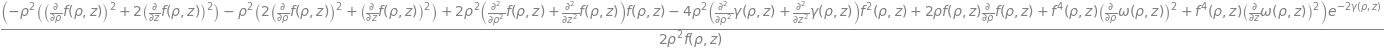

In [25]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [ ]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

In [ ]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

Solving this for the z derivatvie of gamma gives a constraint equation

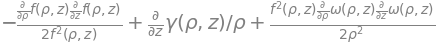

In [26]:
Ric.tensor()[1,3]